In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:

#path=('C:/Users/neil.watt/Documents/R and Python Analysis/UPR/Data/A level attainment by  characteristics*.xlsx')

path='/Users/neilwatt/Documents/BIs/Volunteering/Upreach/Data/statistics_key_stage_5/characteristics /A level attainment by characteristics*.xlsx'



all_data = pd.DataFrame()
for f in glob.glob(path):
    df = pd.read_excel(f, 'Ethnicity_R')
    all_data = all_data.append(df,ignore_index=True)

In [3]:
all_data

,year,Subject,Major_Ethnicity,Minor_Ethnicity,grade,Pupils,Unnamed: 6,year.1,Subject.1,Major_Ethnicity.1,Minor_Ethnicity.1,Three_or_more_A_grades,Pupils.1
0,2015,Accounting/Finance,NaN,NaN,B,58,NaN,2015.0,Three A*-A,NaN,NaN,0.0,33274
1,2015,Accounting/Finance,NaN,NaN,U,8,NaN,2015.0,Three A*-A,NaN,NaN,1.0,10620
2,2015,Accounting/Finance,NaN,NaN,A,55,NaN,2015.0,Three A*-A,Any Other Ethnic Group,Any Other Ethnic Group,0.0,3144
3,2015,Accounting/Finance,NaN,NaN,E,29,NaN,2015.0,Three A*-A,Any Other Ethnic Group,Any Other Ethnic Group,1.0,298
4,2015,Accounting/Finance,NaN,NaN,*,7,NaN,2015.0,Three A*-A,Asian,Asian Other,0.0,3836
5,2015,Accounting/Finance,NaN,NaN,C,57,NaN,2015.0,Three A*-A,Asian,Asian Other,1.0,395
6,2015,Accounting/Finance,NaN,NaN,NaN,0,NaN,2015.0,Three A*-A,Asian,Bangladeshi,0.0,3527
7,2015,Accounting/Finance,NaN,NaN,D,44,NaN,2015.0,Three A*-A,Asian,Bangladeshi,1.0,216
8,2015,Accounting/Finance,Any Other Ethnic Group,Any Other Ethnic Group,E,Supp,NaN,2015.0,Three A*-A,Asian,Indian,0.0,7456
9,2015,Accounting/Finance,Any Other Ethnic Group,Any Other Ethnic Group,D,9,NaN,2015.0,Three A*-A,Asian,Indian,1.0,1122


In [4]:
#from this then create one dataframe 

#grade by subject by ethnicity
df_subject=all_data.iloc[:,[0,1,2,3,4,5]]

#aggregate grades by ethnicity

df_aggregate=all_data.iloc[:,[7,8,9,10,11,12]]


In [5]:
#clean data

#remove NAs
df_subject=df_subject.dropna()

#remove "Supp" pupils
#remove pupils equal Supp
df_subject = df_subject[df_subject.Pupils != 'Supp']

#remove rows with 0 pupils
df_subject = df_subject[df_subject.Pupils != 0]


In [6]:
#create an average by year by subject by minor ethnicity
df_subject['Sum_Pupils_Minor_E_year'] = df_subject.groupby(['year','Subject','Minor_Ethnicity'])['Pupils'].transform(np.sum)

#aggregate % ethnicity by grade by subject by year

#create new column

df_subject['Perc_Grade_Pupils_Minor_E_year']=(df_subject['Pupils'])/(df_subject['Sum_Pupils_Minor_E_year'])*100



decimals = 1    
df_subject['Perc_Grade_Pupils_Minor_E_year'] = df_subject['Perc_Grade_Pupils_Minor_E_year'].apply(lambda x: round(x, decimals))



In [7]:
#all records year=2017
# all record Subject=E

#year=2016
#subject=English

English_2016=df_subject.loc[(df_subject['year'] == 2016) & (df_subject['Subject'] =='English')]

English_2016_A=English_2016.loc[(English_2016['grade'] == 'A')]

English_2016_B=English_2016.loc[(English_2016['grade'] == 'B')]

English_2016_C=English_2016.loc[(English_2016['grade'] == 'C')]




In [8]:
#both these groups had incredibly small particpants and many were SUPP and NA
#White Gypsy/Roma
#White Irish Traveller


#df_subject['Minor_Ethnicity'].isin(['White Gypsy/Roma','White Irish Traveller']) == False
English_Pass=df_subject.loc[(df_subject['Minor_Ethnicity'].isin(['White Gypsy/Roma','White Irish Traveller']) == False)&(df_subject['Subject'] =='English')&(df_subject['grade'].isin(['A', 'B','C']))]
English_Pass

,year,Subject,Major_Ethnicity,Minor_Ethnicity,grade,Pupils,Sum_Pupils_Minor_E_year,Perc_Grade_Pupils_Minor_E_year
2621,2015,English,Any Other Ethnic Group,Any Other Ethnic Group,A,4,113,3.5
2625,2015,English,Any Other Ethnic Group,Any Other Ethnic Group,C,48,113,42.5
2626,2015,English,Any Other Ethnic Group,Any Other Ethnic Group,B,21,113,18.6
2632,2015,English,Asian,Asian Other,A,11,112,9.8
2633,2015,English,Asian,Asian Other,B,32,112,28.6
2634,2015,English,Asian,Asian Other,C,41,112,36.6
2637,2015,English,Asian,Bangladeshi,B,36,153,23.5
2642,2015,English,Asian,Bangladeshi,C,72,153,47.1
2645,2015,English,Asian,Indian,A,22,283,7.8
2649,2015,English,Asian,Indian,C,111,283,39.2


In [9]:

English_Pass.groupby(['Minor_Ethnicity', 'grade']).mean()

year  Sum_Pupils_Minor_E_year  \
Minor_Ethnicity             grade                                     
Any Other Ethnic Group      A      2013.50               133.166667   
                            B      2013.50               133.166667   
                            C      2014.50               126.000000   
Asian Other                 A      2013.50               118.166667   
                            B      2013.50               118.166667   
                            C      2014.00               138.200000   
Bangladeshi                 A      2013.20               137.000000   
                            B      2013.50               139.666667   
                            C      2013.50               139.666667   
Black African               A      2013.50               252.333333   
                            B      2013.50               252.333333   
                            C      2013.50               252.333333   
Black Caribbean             A      2013.50               867.333333   
                            B      2013.80              1016.800000   
                            C      2013.50               867.333333   
Black Other                 A      2012.75               967.500000   
                            B      2014.00                74.000000   
                            C      2013.50               664.500000   
Chinese                     A      2014.00              1192.200000   
                            B      2014.00              1192.200000   
                            C      2013.50               997.666667   
Indian                      A      2013.50               227.000000   
                            B      2013.50               227.000000   
                            C      2013.80               244.600000   
Mixed Other                 A      2013.80               196.400000   
                            B      2013.80               196.400000   
                            C      2013.80               196.400000   
Mixed White/Asian           A      2013.80               380.400000   
                            B      2013.50               327.500000   
                            C      2013.50               327.500000   
Mixed White/Black African   A      2013.00               105.000000   
                            B      2013.50                92.500000   
                            C      2013.80                63.600000   
Mixed White/Black Caribbean A      2013.50               395.000000   
                            B      2013.50               395.000000   
                            C      2013.80               134.800000   
Pakistani                   A      2013.80               268.000000   
                            B      2013.50               239.666667   
                            C      2014.50               304.500000   
Unclassified                A      2013.50               124.166667   
                            B      2013.80               128.000000   
                            C      2013.80               128.000000   
White British               A      2013.50              5946.166667   
                            B      2013.50              5946.166667   
                            C      2014.50              8841.000000   
White Irish                 A      2013.50               125.833333   
                            B      2013.50               125.833333   
                            C      2013.50               125.833333   
White Other                 A      2013.50               307.833333   
                            B      2013.80               285.400000   
                            C      2013.50               307.833333   

                                   Perc_Grade_Pupils_Minor_E_year  
Minor_Ethnicity             grade                                  
Any Other Ethnic Group      A                            7.250000  
                            B                           19.350000  
  

In [10]:

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import random

%matplotlib inline
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

#set ggplot style
#plt.style.use('ggplot')

In [11]:
English_Pass.groupby([ 'grade','Minor_Ethnicity']).mean()['Perc_Grade_Pupils_Minor_E_year'].unstack()

Minor_Ethnicity,Any Other Ethnic Group,Asian Other,Bangladeshi,Black African,Black Caribbean,Black Other,Chinese,Indian,Mixed Other,Mixed White/Asian,Mixed White/Black African,Mixed White/Black Caribbean,Pakistani,Unclassified,White British,White Irish,White Other
grade,,,,,,,,,,,,,,,,,
A,7.25,12.066667,7.640000,9.083333,11.466667,4.650000,22.960000,10.983333,7.26,11.000000,16.180000,7.850000,13.780000,16.633333,20.866667,12.500000,8.700000
B,19.35,26.050000,19.033333,17.266667,22.080000,18.400000,31.500000,19.883333,24.92,21.533333,24.816667,24.983333,20.633333,21.420000,22.533333,31.983333,35.160000
C,38.95,33.120000,34.083333,32.150000,29.100000,33.883333,31.816667,32.000000,32.96,31.350000,31.800000,30.940000,39.425000,41.120000,35.325000,23.016667,29.233333


/Users/neilwatt/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


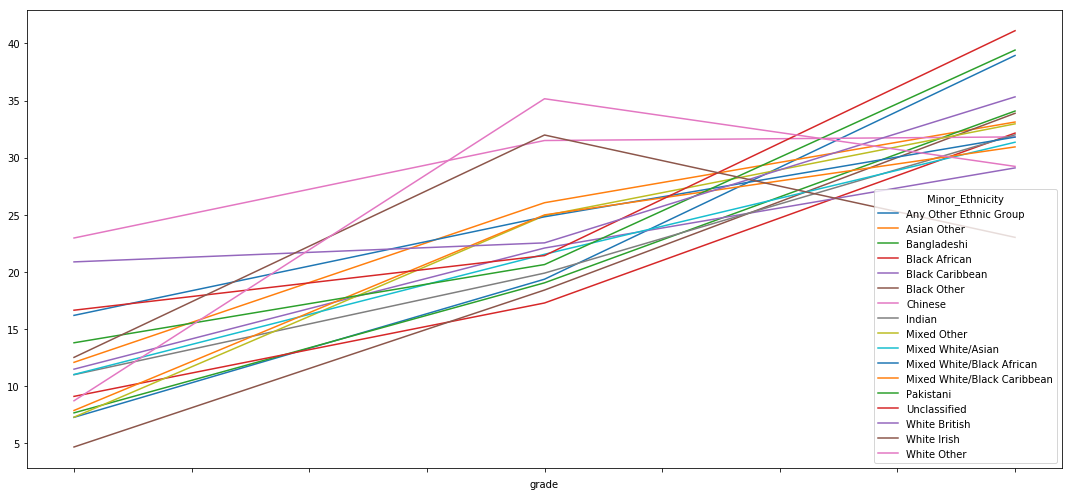

In [12]:
# plot data
#fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)



#English_Pass.groupby(['Minor_Ethnicity', 'grade']).mean()['Perc_Grade_Pupils_Minor_E_year'].unstack().plot(ax=ax)



fig, ax = plt.subplots(figsize=(15,7))
#data.groupby(['date','type']).sum()['amount'].unstack().plot(ax=ax)
English_Pass.groupby(['grade','Minor_Ethnicity']).mean()['Perc_Grade_Pupils_Minor_E_year'].unstack().plot(ax=ax)
plt.subplots_adjust(bottom=0.07)
plt.savefig('fig.png',bbox_inches='tight') 
#English_Pass.groupby(['Minor_Ethnicity', 'grade']).mean()['Perc_Grade_Pupils_Minor_E_year'].unstack()
#ax.set_xlabel('Minor_Ethnicity')
#ax.set_ylabel('Perc_Grade_Pupils_Minor_E_year')

In [ ]:
#english passes by ethnicity, 2016

English_Pass_16=df_subject.loc[(df_subject['year'] == 2016) &(df_subject['Minor_Ethnicity'].isin(['White Gypsy/Roma','White Irish Traveller']) == False)&(df_subject['Subject'] =='English')&(df_subject['grade'].isin(['A', 'B','C']))]

pivot_df = English_Pass_16.pivot(index='Minor_Ethnicity', columns='grade', values='Perc_Grade_Pupils_Minor_E_year')

colors = ["#006D2C", "#31A354","#74C476"]

#fig, ax = plt.subplots(figsize=(15,7))

fig=pivot_df.loc[:,['A','B', 'C']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.title('English Passes by Ethnicity, 2016')

plt.savefig('English Passes by Ethnicity, 2016.png',bbox_inches='tight') 

In [ ]:
pivot_df

In [ ]:
#maths passes by ethnicity, 2016
#Math_Pass=df_subject.loc[(df_subject['Minor_Ethnicity'].isin(['White Gypsy/Roma','White Irish Traveller']) == False)&(df_subject['Subject'] =='Mathematics')&(df_subject['grade'].isin(['A', 'B','C']))]

Math_Pass_16=df_subject.loc[(df_subject['year'] == 2016) &(df_subject['Minor_Ethnicity'].isin(['White Gypsy/Roma','White Irish Traveller']) == False)&(df_subject['Subject'] =='Mathematics')&(df_subject['grade'].isin(['A', 'B','C']))]

pivot_df_maths = Math_Pass_16.pivot(index='Minor_Ethnicity', columns='grade', values='Perc_Grade_Pupils_Minor_E_year')

colors = ["#006D2C", "#31A354","#74C476"]

#fig, ax = plt.subplots(figsize=(15,7))

fig=pivot_df_maths.loc[:,['A','B', 'C']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.title('Maths Passes by Ethnicity, 2016')

plt.savefig('Maths Passes by Ethnicity, 2016.png',bbox_inches='tight') 





In [ ]:
pivot_df_maths

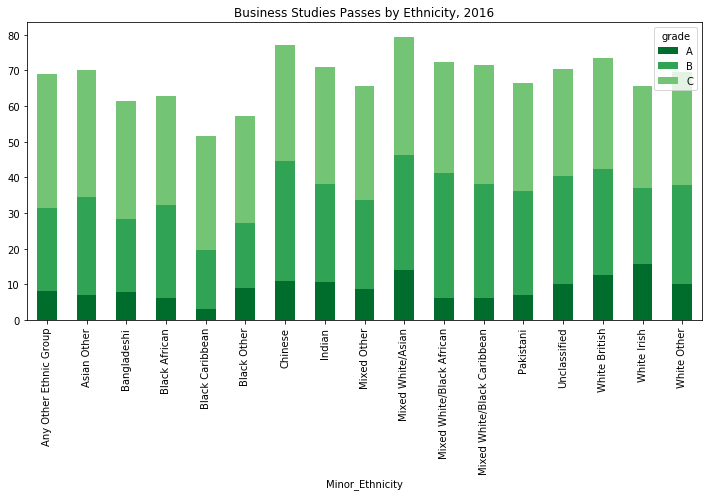

In [16]:
Biz_Pass_16=df_subject.loc[(df_subject['year'] == 2016) &(df_subject['Minor_Ethnicity'].isin(['White Gypsy/Roma','White Irish Traveller']) == False)&(df_subject['Subject'] =='Business Studies')&(df_subject['grade'].isin(['A', 'B','C']))]

pivot_df_Biz = Biz_Pass_16.pivot(index='Minor_Ethnicity', columns='grade', values='Perc_Grade_Pupils_Minor_E_year')

colors = ["#006D2C", "#31A354","#74C476"]

#fig, ax = plt.subplots(figsize=(15,7))

fig=pivot_df_Biz.loc[:,['A','B', 'C']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.title('Business Studies Passes by Ethnicity, 2016')

plt.savefig('Business Studies Passes by Ethnicity, 2016.png',bbox_inches='tight') 


In [17]:
pivot_df_Biz

grade,A,B,C
Minor_Ethnicity,,,
Any Other Ethnic Group,8.2,23.3,37.4
Asian Other,6.9,27.7,35.6
Bangladeshi,7.9,20.3,33.3
Black African,6.2,26.1,30.6
Black Caribbean,3.2,16.3,32.1
Black Other,9.1,18.2,29.9
Chinese,10.9,33.7,32.6
Indian,10.6,27.6,32.7
Mixed Other,8.8,24.9,31.8


In [ ]:
#average from 2011 to 2016
#create an average accross all years by subject by minor ethnicity
df_subject['Sum_Pupils_Minor_E_11_to_16'] = df_subject.groupby(['Subject','Minor_Ethnicity'])['Pupils'].transform(np.sum)

#aggregate % ethnicity by grade by subject by year

#create new column

df_subject['Perc_Grade_Pupils_Minor_E_11_to_16']=(df_subject['Pupils'])/(df_subject['Sum_Pupils_Minor_E_11_to_16'])*100



decimals = 1    
df_subject['Perc_Grade_Pupils_Minor_E_11_to_16'] = df_subject['Perc_Grade_Pupils_Minor_E_11_to_16'].apply(lambda x: round(x, decimals))
df_subject




In [ ]:
#plot chart by year by group by subject

#first latest data (2016)

#import plotly.plotly as py
#import plotly.graph_objs as go


import plotly.offline as offline
import plotly.graph_objs as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']


traces = []

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        traces.append(go.Bar(
            x=[xd[i]],
            y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(
                        color='rgb(248, 248, 249)',
                        width=1)
            )
        ))

layout = go.Layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(
        l=120,
        r=10,
        t=140,
        b=80
    ),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd, 
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
#py.iplot(fig, filename='bar-colorscale')


offline.plot(fig)




In [ ]:
#now averaging percentages by group by subject accross all years

In [ ]:
import pandas as pd
import numpy as np
import glob

all_data = pd.DataFrame()

#/Users/neilwatt/Documents/BIs/Volunteering/Upreach/Data/statistics_key_stage_5/Underlying_Data_A level attainment by characteristics/A level attainment by characteristics*.xlsx

for f in glob.glob("/Users/neilwatt/Documents/BIs/Volunteering/Upreach/Data/statistics_key_stage_5/characteristics/A level attainment by characteristics*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

In [ ]:


glob.glob("/Users/neilwatt/Documents/BIs/Volunteering/Upreach/Data/statistics_key_stage_5/characteristics/A level attainment by characteristics*.xlsx")

In [ ]:
#to create pandas dataframe
import pandas as pd
import numpy as np

#read in csv file
reading_in = pd.read_csv('/Users/neilwatt/Documents/BusinessIdeas/ProfessionalWebsite/2018Posts/July/Clustering2/Most-Recent-Cohorts-All-Data-Elements.csv')
#create dataframe from certain fields
df = pd.DataFrame(reading_in, columns=["INSTNM","CITY","ZIP","LATITUDE","LONGITUDE","ADM_RATE","COSTT4_A","AVGFACSAL","PAR_ED_PCT_HS","PAR_ED_PCT_PS","FEMALE","FIRST_GEN","FAMINC","MD_FAMINC","MEDIAN_HH_INC","MN_EARN_WNE_P6","MD_EARN_WNE_P6","OMAWDP6_FTFT","MN_EARN_WNE_P10","MN_EARN_WNE_P7","MN_EARN_WNE_P8","MN_EARN_WNE_P9"])
#rename fields to be more user friendly
df2=df.rename(index=str, columns={"ADM_RATE": "Admission_rate","COSTT4_A": "Average_cost_attendance","AVGFACSAL": "Average_faculty_salary","PAR_ED_PCT_HS": "Percent__parents_highest_educational_high_school","PAR_ED_PCT_PS": "Percent_of_students_whose_parents_highest_educational_level_was_is_some_form_of_postsecondary_education","FEMALE": "Share_of_female_students","FIRST_GEN": "Share_of_firstgeneration_students","FAMINC": "Average_family_income_in_real_2015_dollars","MD_FAMINC": "Median_family_income_in_real_2015_dollars","MEDIAN_HH_INC": "Median_household_income","MN_EARN_WNE_P6": "Mean_earnings_of_students_working_6_years_after","MD_EARN_WNE_P6": "Median_earnings_6_years_after","OMAWDP6_FTFT": "Percent_award_6_years","MN_EARN_WNE_P7": "Mean_earnings_of_students_working_7_years_after","MN_EARN_WNE_P8": "Mean_earnings_of_students_working_8_years_after","MN_EARN_WNE_P9": "Mean_earnings_of_students_working_9_years_after","MN_EARN_WNE_P10": "Mean_earnings_of_students_working_10_years_after"})


In [ ]:
#have a look at number of null rows
df2.isnull()

In [ ]:
df3a=df2.dropna()
df3=df3a.mask(df3a.astype(object).eq('PrivacySuppressed')).dropna()
df3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df3.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('US College Stats Correlation Heatmap', fontsize=14)
plt.savefig('US College Stats Correlation Heatmap',bbox_inches = 'tight')

In [ ]:
#PROPER
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# Attributes of interest
cols = ['Average_cost_attendance','Percent__parents_highest_educational_high_school','Average_family_income_in_real_2015_dollars','Mean_earnings_of_students_working_6_years_after']

pp = sns.pairplot(df3[cols], 
                  size=3.5, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=1.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=1.5, wspace=0.5)
fig.suptitle('US College Stats Pairwise Plot', 
              fontsize=40, fontweight='bold')
plt.savefig('US College Stats  Pairwise Plot.png', bbox_inches = 'tight',pad_inches=0.5,format='png')

In [ ]:
#Here I am creating a new column- EarningsCostRatio, which is a function of he earnings after 6 years and average costs for each institution

#because earnings is a object type we first need to convert to float before dividing by cost (a float type)
#note that I am also reading in the mean earnings for other years, the reason is I will use them later to calibrate a gradient for each instituion

df3['Mean_earnings_float'] = df3['Mean_earnings_of_students_working_6_years_after'].astype('float64') 
df3['Mean_earnings_float7'] = df3['Mean_earnings_of_students_working_7_years_after'].astype('float64') 
df3['Mean_earnings_float8'] = df3['Mean_earnings_of_students_working_8_years_after'].astype('float64') 
df3['Mean_earnings_float9'] = df3['Mean_earnings_of_students_working_9_years_after'].astype('float64') 
df3['Mean_earnings_float10'] = df3['Mean_earnings_of_students_working_10_years_after'].astype('float64') 



df3['Earnings_Cost_Ratio'] = df3['Mean_earnings_float']/df3['Average_cost_attendance']
df3['Earnings_Cost_Ratio'].describe()




In [ ]:
#import plotly.plotly as py
import plotly.plotly
import pandas as pd
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)


df3['text'] = df3['INSTNM'] + '' + df3['CITY'] + ', ' + df3['CITY'] + '' + 'Earnings/Cost Ratio: ' + df3['Earnings_Cost_Ratio'].astype(str)

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]
    
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df3['LONGITUDE'],
        lat = df3['LATITUDE'],
        text = df3['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df3['Earnings_Cost_Ratio'],
            cmax = df3['Earnings_Cost_Ratio'].max(),
            colorbar=dict(
            title="Earnings to Cost ratio by College"
            )
        ))]

layout = dict(
        title = 'Earnings to Cost ratio by College<br>(Hover for college names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )

fig = dict( data=data, layout=layout )


plotly.offline.iplot( fig, validate=False )



In [ ]:
#plotting earning/cost ratios, earnings



    
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

    

size = df3['Earnings_Cost_Ratio']*25

fig=plt.scatter(df3['Earnings_Cost_Ratio'], df3['Mean_earnings_float'], s=size, 
            alpha=0.4)




plt.xlabel('Earnings/Cost Ratio')
plt.ylabel('Mean Earnings after 6 Years')
plt.title('Earnings/Cost Ratio versus Mean Earnings',y=1.05)

plt.savefig('Earnings Cost Ratio versus Mean Earnings.png', bbox_inches = 'tight',pad_inches=0.5,format='png')

In [ ]:

#it is necessary to convert the original string values of mean earnings to float in order ot perform operations on them
df3['Mean_earnings_float'] = df3['Mean_earnings_of_students_working_6_years_after'].astype('float64') 
df3['Mean_earnings_float7'] = df3['Mean_earnings_of_students_working_7_years_after'].astype('float64') 
df3['Mean_earnings_float8'] = df3['Mean_earnings_of_students_working_8_years_after'].astype('float64') 
df3['Mean_earnings_float9'] = df3['Mean_earnings_of_students_working_9_years_after'].astype('float64') 
df3['Mean_earnings_float10'] = df3['Mean_earnings_of_students_working_10_years_after'].astype('float64') 

#here I am computing gradients for each interval of time
df3['Mean_earnings_gradient1']=(df3['Mean_earnings_float7']-df3['Mean_earnings_float'])
df3['Mean_earnings_gradient2']=(df3['Mean_earnings_float8']-df3['Mean_earnings_float7'])
df3['Mean_earnings_gradient3']=(df3['Mean_earnings_float9']-df3['Mean_earnings_float8'])
df3['Mean_earnings_gradient4']=(df3['Mean_earnings_float10']-df3['Mean_earnings_float9'])

cols = ['Mean_earnings_gradient1','Mean_earnings_gradient2','Mean_earnings_gradient3','Mean_earnings_gradient4']

#create new gradient column averaged out over 4 years
df3['Mean_earnings_gradient']=df3[cols].mean(axis=1)
df3['Mean_earnings_gradient']


#we notice some instituions have a negative gradient, we are going to remove them as they are otherwise going to give us very meaningless results.

df4 = df3[(df3['Mean_earnings_gradient'] >= 0)]
df4['Mean_earnings_gradient']

#we end up with 1137 rows from 1143, we lost 6 rows- no big deal

In [ ]:
#define finitial earnings estimate in order to project forward

df4['Initial_Earnings_Estimate']=df4['Mean_earnings_float']-df4['Mean_earnings_gradient']*5

#let's just double check we don't get any silly values
df4['Initial_Earnings_Estimate'].describe()


In [ ]:


#cashflow in year i, yi =m*i + Initial_Earnings_Estimate

#here I'm using a discount rate of 10%
rate=0.07

#discounted cashflow (yi =m*i)/(1+rate)^i


def NPV(n):
    return sum((df4['Mean_earnings_gradient']*k+df4['Initial_Earnings_Estimate'])/((np.power(1+rate, k+3))) for k in range(1, n+1))
    #return (cashflow(n)*cashflow(n+1))/2



df4['NPV']=NPV(49)



df4['NPV'].describe()

In [ ]:
testing=0.1

def NPV(n):
    return sum(1.0/((np.power(1+testing, k))) for k in range(1, n+1))
    #return (cashflow(n)*cashflow(n+1))/2



a=NPV(5)
a

In [ ]:
#define net present value of minimum wage earners
#we already defined the discount rate above 

#discounted cashflow (yi =m*i)/(1+rate)^i
minwage = 7.25
hours_year=2080
min_initial_annual_earnings=minwage*hours_year
inflation =0.02

def minNPV(n):
    return sum((min_initial_annual_earnings*(np.power(1+inflation, k)))/((np.power(1+rate, k))) for k in range(1, n+1))
    
minimumwageNPV=minNPV(53)
minimumwageNPV







In [ ]:
#let's define a new metric % return on investment

df4['lifetime_percent_return']=(df4['NPV']-minimumwageNPV)/(df4['Average_cost_attendance']*4)*100

#df4['lifetime_percent_return'].describe()

lifetimeROI10perc= df4['lifetime_percent_return'].quantile(0.9)

NPV10perc= df4['NPV'].quantile(0.9)

NPV10perc

In [ ]:
#let's select only those institutions in the top 25 percentile and create a new dataframe


#with our newly defined metric we can now compare institutions
cols = ['INSTNM','NPV','lifetime_percent_return']


df5a = df4[(df4['lifetime_percent_return'] >= 564)]

df5=df5a.sort_values(by=['lifetime_percent_return'], ascending=False)

df5[cols]

In [ ]:
#import plotly.plotly as py
import plotly.plotly
import pandas as pd
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)


df5['text'] = df5['INSTNM'] + '' + df5['CITY'] + ', ' + df5['CITY'] + '' + 'Return on Investment: ' + df5['lifetime_percent_return'].astype(str)

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]
    
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df5['LONGITUDE'],
        lat = df5['LATITUDE'],
        text = df5['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = df5['lifetime_percent_return'].min(),
            color = df5['lifetime_percent_return'],
            cmax = df5['lifetime_percent_return'].max(),
            colorbar=dict(
            title="Top 10% ROI US College Stats"
            )
        ))]

layout = dict(
        title = 'Top 10% ROI US College Stats<br>(Hover for college names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )

fig = dict( data=data, layout=layout )


plotly.offline.iplot( fig, validate=False )



In [ ]:
#select top ten institutions by lifetime ROI
cols = ['INSTNM','NPV','lifetime_percent_return']

df6a = df4.nlargest(10,'lifetime_percent_return')
df6=df6a.sort_values(by=['lifetime_percent_return'], ascending=False)
df6[cols]



In [ ]:
#Plotting lifetime ROI and NPV


import plotly.graph_objs as go
import plotly.plotly
import numpy as np
import pandas as pd
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

x=df6['Average_cost_attendance']*4
y=df6['lifetime_percent_return']
z=df6['NPV']
n=df6['INSTNM']


 
df6['text'] = df6['INSTNM'] + '' + df6['CITY'] + ', ' + df6['CITY'] + '' + 'lifetime_percent_return: ' + df6['lifetime_percent_return'].astype(str)

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]
    
size = df6['NPV']


trace1 = go.Scatter(
    y=df6['lifetime_percent_return'],
    x=df6['Average_cost_attendance']*4,
    text = df6['INSTNM'],
    textfont=dict(
        family='sans serif',
        size=7,    
    ),
    mode='markers+text',
    marker = dict( 
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4,
            colorscale = scl,
            cmin = df6['NPV'].min(),
            color = df6['NPV'],
            cmax = df6['NPV'].max(),
            colorbar=dict(
            title="Lifetime NPV US College Stats"
            )
        )
)
data1 = [trace1]
layout3= go.Layout(
   
 title= 'Lifetime ROI US College Stats',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Cost of Attendance',
        ticklen= 5,
        zeroline= False,
        gridwidth= 1,
        #range=[50, df7['Cost_Attendance'].max()],
),
    yaxis=dict(
        title= 'Top 10 Lifetime Real Return On Investment',
        ticklen= 5,
        gridwidth= 1,
        
    ),
    showlegend= False
    
)


fig = dict( data=data1 ,layout=layout3)
plotly.offline.iplot( fig, validate=False )



In [ ]:
          
                   
       #discounted cashflow (yi =m*i)/(1+rate)^i
minwage = 7.25
hours_year=2080
min_initial_annual_earnings=minwage*hours_year
inflation =0.02
rate=0.07

def minNPV(n):
    return sum((min_initial_annual_earnings*(np.power(1+inflation, k)))/((np.power(1+rate, k))) for k in range(1, n))
    
#remembering we are assuming on average courses last 4 years
minimumwageNPV10=minNPV(14)
minimumwageNPV10            
               

In [ ]:
#I assume the minium wage increases at the level of inflation which I set above

def costs(n):
    
    return sum(
             ((((np.power(1+inflation, k)))*df4['Average_cost_attendance'])/((np.power(1+rate, k))) for k in range(1, n))
)


DiscountedCosts=costs(4)
df4['Cost_Attendance']=DiscountedCosts

In [ ]:
#We estimated the intitial earnings by projecting back using the average gradient of earnings form year 6 to year 10


def NPV5(n):
    return sum(
             ((df4['Mean_earnings_gradient']*k+df4['Initial_Earnings_Estimate'])/((np.power(1+rate, k+4))) for k in range(1, n))
) 


DiscountedEarnings=NPV5(5)+df4['Mean_earnings_float'] /((np.power(1+rate, 6)))+df4['Mean_earnings_float7'] /((np.power(1+rate, 7)))+df4['Mean_earnings_float8'] /((np.power(1+rate, 8)))+df4['Mean_earnings_float9']/((np.power(1+rate, 9)))+df4['Mean_earnings_float10'] /((np.power(1+rate,10)))




#Define NPV
df4['NPV_10yrs']= (DiscountedEarnings-costs(4)-minimumwageNPV10 )



#let's take a look at the top Institutions by NPV after 10 years
df4=df4.sort_values(by=['NPV_10yrs'], ascending=False)



In [ ]:
#Real Rate of Return
#We can debate here whethere or not opportunity cost should be counted as an investment, since it's a cost i am counting it as an investment

df4['Real_ROI_10yrs']=df4['NPV_10yrs']/((costs(4)+minimumwageNPV10 ))*100
df4['Real_ROI_10yrs'].describe()





In [ ]:
df4=df4.sort_values(by=['Real_ROI_10yrs'], ascending=False)


cols = ['INSTNM','Real_ROI_10yrs','NPV_10yrs']

df4[cols]

In [ ]:

Year10ROI10perc= df4['Real_ROI_10yrs'].quantile(0.9)

Year10ROI10perc

In [ ]:

Year10ROI50perc= df4['Real_ROI_10yrs'].quantile(0.5)

Year10ROI50perc

In [ ]:
cols = ['INSTNM','Real_ROI_10yrs','NPV_10yrs','Cost_Attendance']

df7 = df4.nlargest(10,'Real_ROI_10yrs')

df7[cols]


In [ ]:
import plotly.graph_objs as go
import plotly.plotly
import numpy as np
import pandas as pd
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

x=df7['Cost_Attendance']
y=df7['Real_ROI_10yrs']
z=df7['NPV_10yrs']
n=df7['INSTNM']

 
df7['text'] = df7['INSTNM'] + '' + df7['CITY'] + ', ' + df7['CITY'] + '' + 'Real_ROI_10yrs: ' + df7['Real_ROI_10yrs'].astype(str)

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]
    
size = df7['NPV_10yrs']


trace1 = go.Scatter(
    y=df7['Real_ROI_10yrs'],
    x=df7['Cost_Attendance'],
    text = df7['INSTNM'],
    textfont=dict(
        family='sans serif',
        size=7,    
    ),
    mode='markers+text',
    marker = dict( 
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4,
            colorscale = scl,
            cmin = df7['NPV_10yrs'].min(),
            color = df7['NPV_10yrs'],
            cmax = df7['NPV_10yrs'].max(),
            colorbar=dict(
            title="10 Year NPV US College Stats"
            )
        )
)
data1 = [trace1]
layout3= go.Layout(
   
 title= '10 Year ROI US College Stats',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Cost of Attendance',
        ticklen= 5,
        zeroline= False,
        gridwidth= 1,
        #range=[50, df7['Cost_Attendance'].max()],
),
    yaxis=dict(
        title= 'Real Return On Investment after 10yrs',
        ticklen= 5,
        gridwidth= 1,
        
    ),
    showlegend= False
    
)


fig = dict( data=data1 ,layout=layout3)
plotly.offline.iplot( fig, validate=False )

